In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [29]:
df = pd.read_csv("/content/Retail Sales Analysis_utf .csv")  # Use read_excel for Excel files or another function for different formats
df.head(10)

,transactions_id,sale_date,sale_time,customer_id,gender,age,category,quantiy,price_per_unit,cogs,total_sale
0,180,2022-11-05,10:47:00,117,Male,41.0,Clothing,3.0,300.0,129.0,900.0
1,522,2022-07-09,11:00:00,52,Male,46.0,Beauty,3.0,500.0,145.0,1500.0
2,559,2022-12-12,10:48:00,5,Female,40.0,Clothing,4.0,300.0,84.0,1200.0
3,1180,2022-01-06,08:53:00,85,Male,41.0,Clothing,3.0,300.0,129.0,900.0
4,1522,2022-11-14,08:35:00,48,Male,46.0,Beauty,3.0,500.0,235.0,1500.0
5,1559,2022-08-20,07:40:00,49,Female,40.0,Clothing,4.0,300.0,144.0,1200.0
6,163,2022-10-31,09:38:00,144,Female,64.0,Clothing,3.0,50.0,23.0,150.0
7,303,2022-04-22,11:09:00,54,Male,19.0,Electronics,3.0,30.0,14.7,90.0
8,421,2022-04-08,08:43:00,66,Female,37.0,Clothing,3.0,500.0,235.0,1500.0
9,979,2022-05-18,10:18:00,6,Female,19.0,Beauty,1.0,25.0,10.5,25.0


In [30]:
columns_list = df.columns.tolist()
print(columns_list)

['transactions_id', 'sale_date', 'sale_time', 'customer_id', 'gender', 'age', 'category', 'quantiy', 'price_per_unit', 'cogs', 'total_sale']


In [31]:
# Display basic info about the dataset to check for null values
print("Dataset Overview Before Cleaning:")
print(df.info())  # Shows data types and null counts


Dataset Overview Before Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   transactions_id  2000 non-null   int64  
 1   sale_date        2000 non-null   object 
 2   sale_time        2000 non-null   object 
 3   customer_id      2000 non-null   int64  
 4   gender           2000 non-null   object 
 5   age              1990 non-null   float64
 6   category         2000 non-null   object 
 7   quantiy          1997 non-null   float64
 8   price_per_unit   1997 non-null   float64
 9   cogs             1997 non-null   float64
 10  total_sale       1997 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 172.0+ KB
None


In [32]:
numerical_columns = ['age', 'quantity', 'price_per_unit', 'cogs', 'total_sale']
for col in numerical_columns:
    if col in df.columns:
        df[col].fillna(df[col].mean(), inplace=True)

<ipython-input-32-74aa2517c18d>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


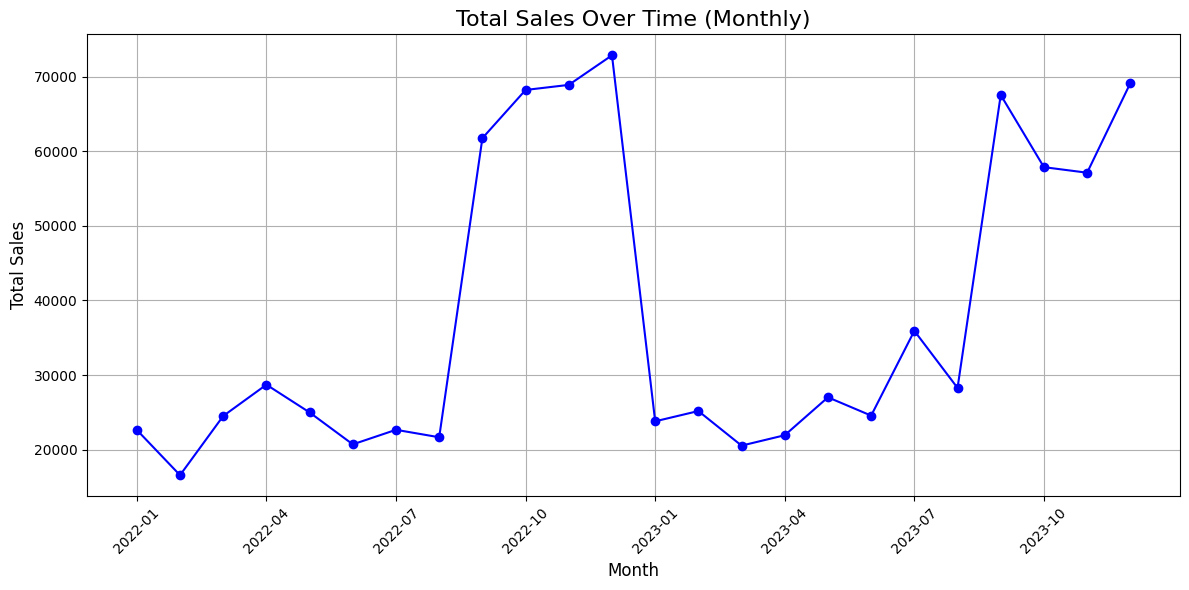

In [33]:
df['sale_date'] = pd.to_datetime(df['sale_date'])

# Aggregate sales by month
sales_over_time = df.groupby(df['sale_date'].dt.to_period('M'))['total_sale'].sum()

# Plot the aggregated data
plt.figure(figsize=(12, 6))
plt.plot(sales_over_time.index.astype(str), sales_over_time.values, marker='o', color='blue', linestyle='-')
plt.title('Total Sales Over Time (Monthly)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid()

# Reduce the number of ticks shown on the x-axis
plt.xticks(rotation=45, ticks=range(0, len(sales_over_time), 3))  # Show every 3rd tick
plt.tight_layout()
plt.show()

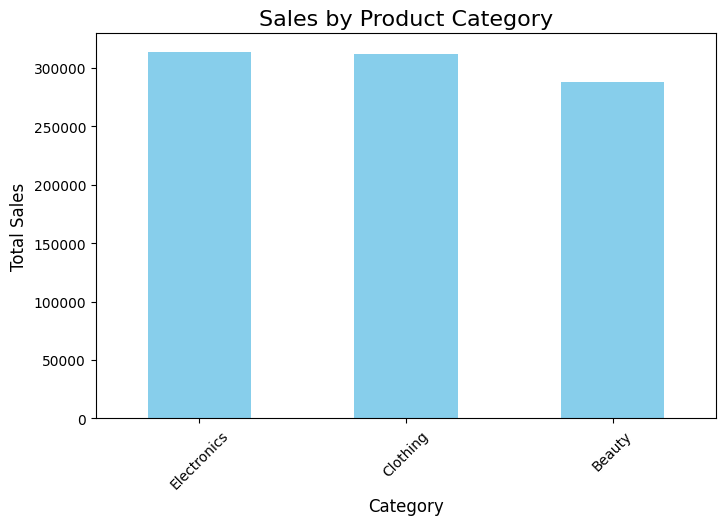

In [34]:
# Aggregate sales by category
sales_by_category = df.groupby('category')['total_sale'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sales_by_category.plot(kind='bar', color='skyblue')
plt.title('Sales by Product Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.show()

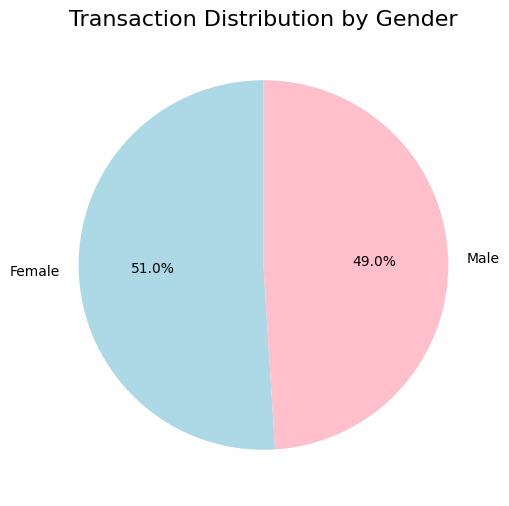

In [35]:
# Gender counts
gender_counts = df['gender'].value_counts()

# Plot
plt.figure(figsize=(6, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink'])
plt.title('Transaction Distribution by Gender', fontsize=16)
plt.ylabel('')
plt.show()

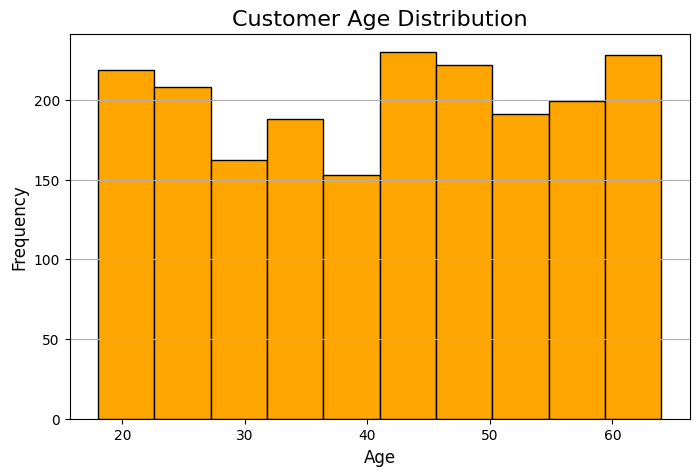

In [36]:
# Plot
plt.figure(figsize=(8, 5))
plt.hist(df['age'], bins=10, color='orange', edgecolor='black')
plt.title('Customer Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y')
plt.show()

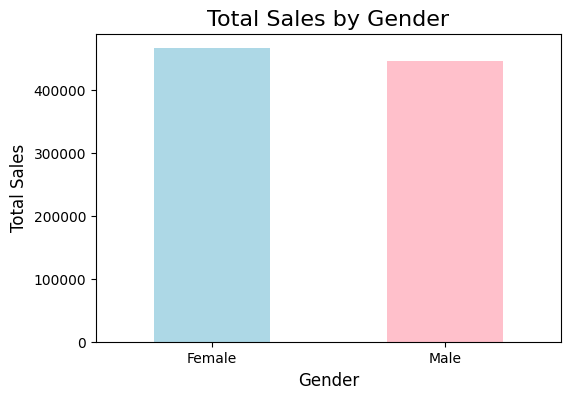

In [37]:
# Aggregate sales by gender
sales_by_gender = df.groupby('gender')['total_sale'].sum()

# Plot
plt.figure(figsize=(6, 4))
sales_by_gender.plot(kind='bar', color=['lightblue', 'pink'])
plt.title('Total Sales by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=0)
plt.show()

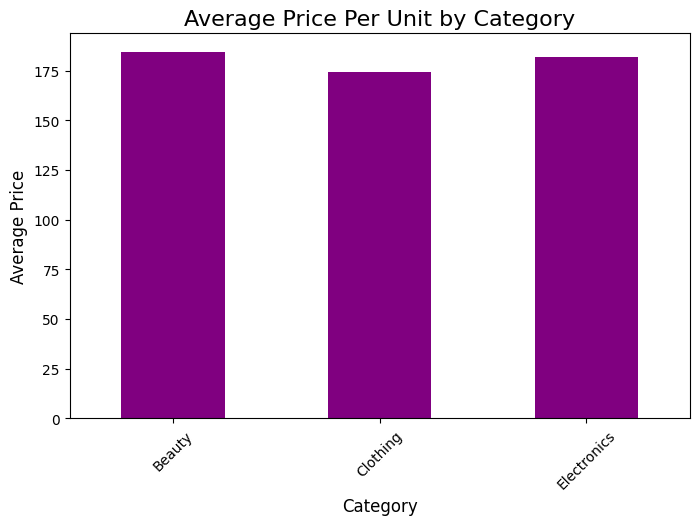

In [38]:
# Calculate average price per unit by category
avg_price_by_category = df.groupby('category')['price_per_unit'].mean()

# Plot
plt.figure(figsize=(8, 5))
avg_price_by_category.plot(kind='bar', color='purple')
plt.title('Average Price Per Unit by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45)
plt.show()

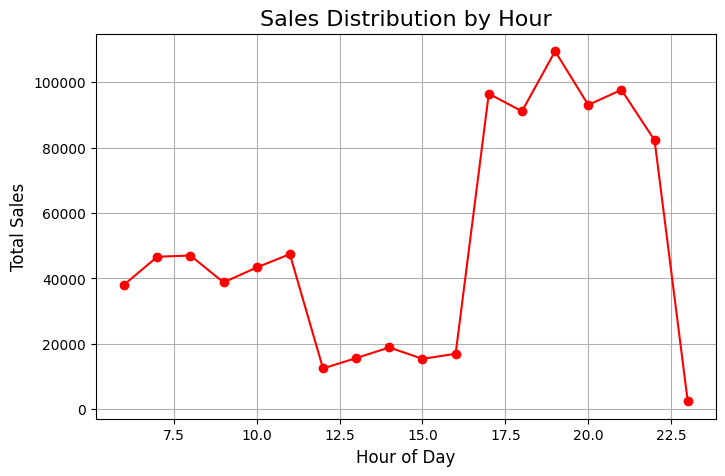

In [39]:
# Extract hour from sale_time
df['hour'] = pd.to_datetime(df['sale_time'], format='%H:%M:%S').dt.hour

# Aggregate sales by hour
sales_by_hour = df.groupby('hour')['total_sale'].sum()

# Plot
plt.figure(figsize=(8, 5))
sales_by_hour.plot(kind='line', marker='o', color='red')
plt.title('Sales Distribution by Hour', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid()
plt.show()

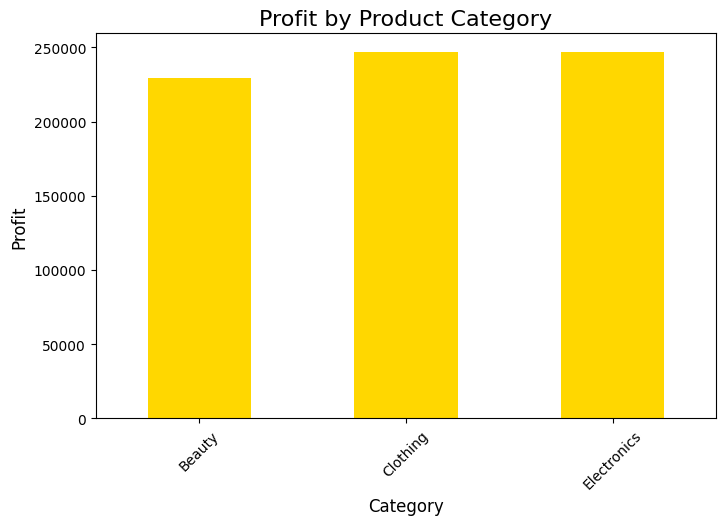

In [40]:
# Calculate profit (total_sale - cogs) for each category
df['profit'] = df['total_sale'] - df['cogs']
profit_by_category = df.groupby('category')['profit'].sum()

# Plot
plt.figure(figsize=(8, 5))
profit_by_category.plot(kind='bar', color='gold')
plt.title('Profit by Product Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.xticks(rotation=45)
plt.show()

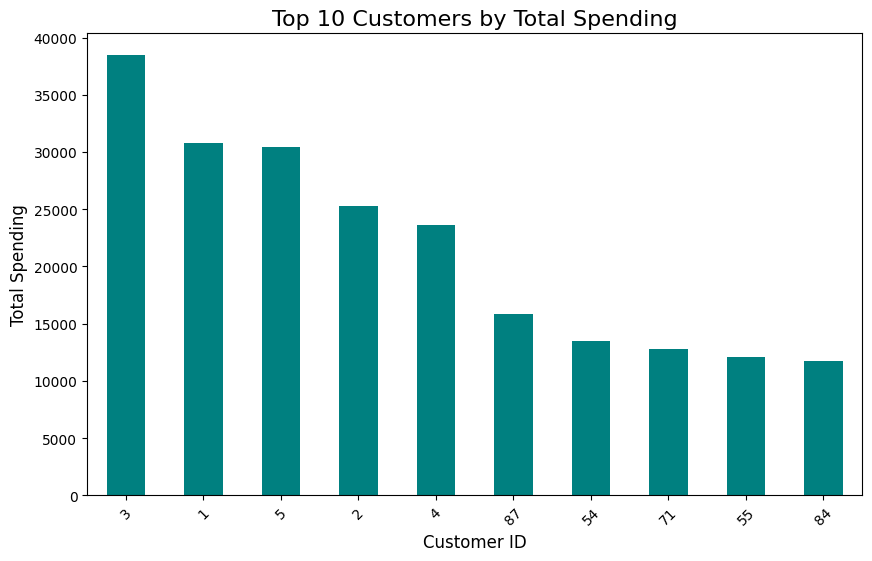

In [41]:
# Aggregate total sales by customer
top_customers = df.groupby('customer_id')['total_sale'].sum().nlargest(10)

# Plot
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='teal')
plt.title('Top 10 Customers by Total Spending', fontsize=16)
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Total Spending', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [42]:
df = df.drop_duplicates()

In [43]:
monthly_sales = df.groupby(df['sale_date'].dt.to_period('M'))['total_sale'].sum().reset_index()

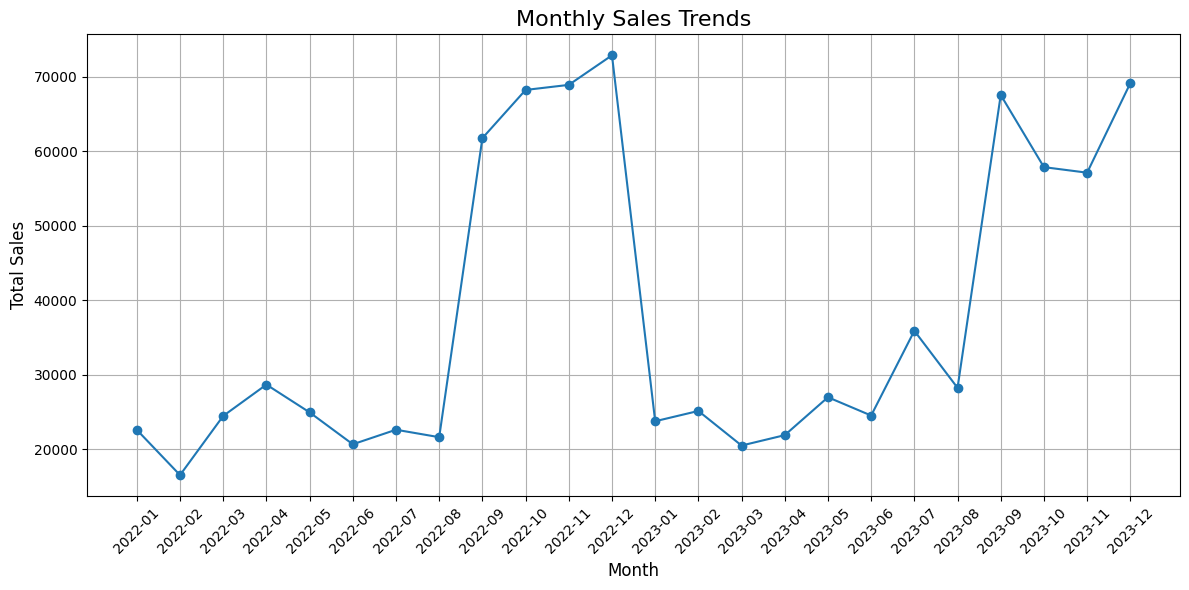

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['sale_date'].astype(str), monthly_sales['total_sale'], marker='o')
plt.title('Monthly Sales Trends', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

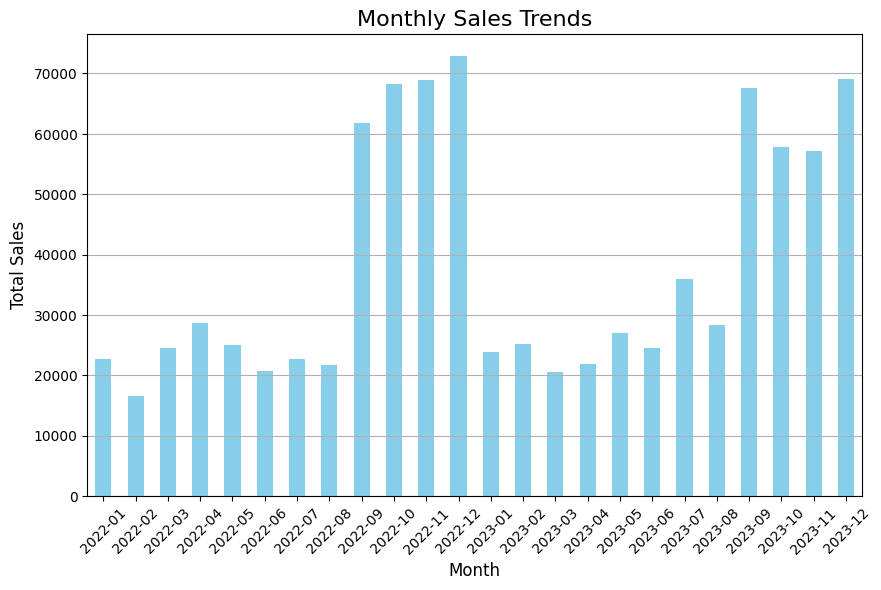

In [45]:
df['sale_date'] = pd.to_datetime(df['sale_date'])  # Ensure the date column is in datetime format
df['month'] = df['sale_date'].dt.to_period('M')   # Extract month as "Year-Month"
monthly_sales = df.groupby('month')['total_sale'].sum()

# Visualization
monthly_sales.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Monthly Sales Trends', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [48]:
# Create a connection to an SQLite database
conn = sqlite3.connect('sales_data.db')  # This will create a new database file named 'sales_data.db'


In [51]:
print(df.dtypes)

transactions_id             int64
sale_date          datetime64[ns]
sale_time                  object
customer_id                 int64
gender                     object
age                       float64
category                   object
quantiy                   float64
price_per_unit            float64
cogs                      float64
total_sale                float64
hour                        int32
profit                    float64
month                   period[M]
dtype: object


In [52]:
df['sale_date'] = df['sale_date'].astype(str)
df['month'] = df['month'].astype(str)

In [53]:
df = df.fillna({
    'gender': 'Unknown',          # Replace missing gender with 'Unknown'
    'age': 0,                     # Replace missing age with 0
    'quantiy': 0,                 # Replace missing quantity with 0
    'price_per_unit': 0.0,        # Replace missing price per unit with 0.0
    'cogs': 0.0,                  # Replace missing COGS with 0.0
    'total_sale': 0.0,            # Replace missing total sale with 0.0
    'profit': 0.0                 # Replace missing profit with 0.0
})

In [54]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype(str)

In [55]:
df.to_sql('sales_data', conn, if_exists='replace', index=False)
print("Data has been successfully loaded into the SQLite database.")

Data has been successfully loaded into the SQLite database.


In [58]:
# Save the DataFrame into an SQLite table
df.to_sql('sales_data', conn, if_exists='replace', index=False)  # Replace 'sales_data' with your desired table name
print("Data has been successfully loaded into the SQLite database.")

Data has been successfully loaded into the SQLite database.


In [59]:
# Example query to check the first 5 rows
query = "SELECT * FROM sales_data LIMIT 5;"
result = pd.read_sql(query, conn)
print(result)

   transactions_id   sale_date sale_time  customer_id  gender   age  category  \
0              180  2022-11-05  10:47:00          117    Male  41.0  Clothing   
1              522  2022-07-09  11:00:00           52    Male  46.0    Beauty   
2              559  2022-12-12  10:48:00            5  Female  40.0  Clothing   
3             1180  2022-01-06  08:53:00           85    Male  41.0  Clothing   
4             1522  2022-11-14  08:35:00           48    Male  46.0    Beauty   

   quantiy  price_per_unit   cogs  total_sale  hour  profit    month  
0      3.0           300.0  129.0       900.0    10   771.0  2022-11  
1      3.0           500.0  145.0      1500.0    11  1355.0  2022-07  
2      4.0           300.0   84.0      1200.0    10  1116.0  2022-12  
3      3.0           300.0  129.0       900.0     8   771.0  2022-01  
4      3.0           500.0  235.0      1500.0     8  1265.0  2022-11  


In [60]:
query = """
SELECT strftime('%Y-%m', sale_date) AS month, SUM(total_sale) AS total_sales
FROM sales_data
GROUP BY month
ORDER BY month;
"""
monthly_sales = pd.read_sql(query, conn)
print(monthly_sales)

      month   total_sales
0   2022-01  22635.000000
1   2022-02  16566.544817
2   2022-03  24505.000000
3   2022-04  28705.000000
4   2022-05  24980.000000
5   2022-06  20700.000000
6   2022-07  22651.544817
7   2022-08  21651.544817
8   2022-09  61770.000000
9   2022-10  68235.000000
10  2022-11  68915.000000
11  2022-12  72880.000000
12  2023-01  23790.000000
13  2023-02  25170.000000
14  2023-03  20530.000000
15  2023-04  21925.000000
16  2023-05  27010.000000
17  2023-06  24555.000000
18  2023-07  35925.000000
19  2023-08  28270.000000
20  2023-09  67560.000000
21  2023-10  57880.000000
22  2023-11  57135.000000
23  2023-12  69145.000000


In [61]:
 query = """
SELECT category, SUM(total_sale) AS total_sales
FROM sales_data
GROUP BY category
ORDER BY total_sales DESC
LIMIT 10;
"""
top_products = pd.read_sql(query, conn)
print(top_products)

      category    total_sales
0  Electronics  313810.000000
1     Clothing  311526.544817
2       Beauty  287753.089634


In [62]:
query = """
SELECT gender, COUNT(DISTINCT customer_id) AS customer_count, SUM(total_sale) AS total_sales
FROM sales_data
GROUP BY gender;
"""
customer_insights = pd.read_sql(query, conn)
print(customer_insights)

   gender  customer_count    total_sales
0  Female             153  466769.634452
1    Male             153  446320.000000


In [63]:
class Product:
    def __init__(self, product_id, category, price):
        self.product_id = product_id
        self.category = category
        self.price = price

class Transaction:
    def __init__(self, transaction_id, product, quantity):
        self.transaction_id = transaction_id
        self.product = product
        self.quantity = quantity

    def total_cost(self):
        return self.product.price * self.quantity

# Example Usage
product = Product(product_id=1, category='Electronics', price=100)
transaction = Transaction(transaction_id=101, product=product, quantity=3)
print(f'Total Cost: {transaction.total_cost()}')

Total Cost: 300


In [64]:
class Product:
    def __init__(self, product_id, name, category, price):
        self.product_id = product_id
        self.name = name
        self.category = category
        self.price = price

    def __str__(self):
        return f"{self.name} ({self.category}) - ${self.price}"

class SalesTransaction:
    def __init__(self, transaction_id, product, quantity, date):
        self.transaction_id = transaction_id
        self.product = product
        self.quantity = quantity
        self.date = date

    def total_sales(self):
        return self.product.price * self.quantity

# Example usage
product1 = Product(101, 'Laptop', 'Electronics', 1000)
transaction1 = SalesTransaction(1, product1, 3, '2025-01-10')

print(transaction1.total_sales())  # Outputs the total sales for this transaction

3000
